# KNN REGRESSION

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tabulate import tabulate

## Pre-Processing

In [2]:
# To read data from diamonds.csv
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]

label_encoder = preprocessing.LabelEncoder()

data['cut']= label_encoder.fit_transform(data['cut'])
data['color']= label_encoder.fit_transform(data['color'])
data['clarity']= label_encoder.fit_transform(data['clarity'])

In [3]:
def min_max_normalize(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)

    d = max_val - min_val

    X = X - min_val
    X = X / d

    return X

def standardization(X):
    mean = np.mean(X, axis=0)

    sd = X - mean
    sd = np.square(sd)

    sd = np.sum(sd, axis=0)
    sd = sd/X.shape[0]

    X = X - mean
    X = X/sd

    return X

def separte_features_and_outputs(data, drop_list, normalize_type=0):
    X = data.drop(drop_list, axis=1)
    Y = data['price']

    X = X.to_numpy().astype(np.float)
    Y = Y.to_numpy().astype(np.float)

    if normalize_type == 0:
        X = min_max_normalize(X)
    elif normalize_type == 1:
        X = standardization(X)
        
    return X, Y

## **KNN Regression [Diamond Price Prediction Dataset]**

### Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [4]:
X, Y = separte_features_and_outputs(data, ['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [5]:
# code for knn regression
def knn_regressor_euclidean_dis(k, X_train, Y_train, X_test):
    
    Y_pred = []
    for ind in tqdm(range(X_test.shape[0])):

        dis = X_train - X_test[ind]
        dis = np.square(dis)
        dis = np.sum(dis, axis=1)
        
        idx = np.argpartition(dis, k)
        
        price = 0
        for i in range(k):
            price = price + Y_train[idx[i]]
        
        price = price/k
        Y_pred.append(price)
        
    Y_pred = np.array(output)
    return Y_pred

### Do we need to normalise data? [If so Does it make any difference?].


- In data, for different feature there are different ranges.

- if one of the feature is in the range of 1000’s
- another is in the range of 0.1’s 

- then, the weigtage first variable would be (most likely) much larger than the weightage the second variable. 
- Which shows first feature is more important than another.

- To avoid this case if we normalize it to fiven range then importnace would be given same

### Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [6]:
# show all the experiments
def knn_regressor_euclidean_dis(k, X_train, Y_train, X_test):
    
    output = []
    for ind in tqdm(range(X_test.shape[0])):

        dis = X_train - X_test[ind]
        dis = np.square(dis)
        dis = np.sum(dis, axis=1)
        
        idx = np.argpartition(dis, k)
        
        price = 0
        for i in range(k):
            price = price + Y_train[idx[i]]
        
        price = price/k
        output.append(price)
        
    output = np.array(output)
    return output

def knn_regressor_manhattan_dis(k, X_train, Y_train, X_test):
    
    output = []
    for ind in tqdm(range(X_test.shape[0])):

        dis = X_train - X_test[ind]
        dis = np.absolute(dis)
        dis = np.sum(dis, axis=1)
        
        idx = np.argpartition(dis, k)
        
        price = 0
        for i in range(k):
            price = price + Y_train[idx[i]]
        
        price = price/k
        output.append(price)
        
    output = np.array(output)
    return output

### Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [7]:
# report a table
def cal_MSE(Y_pred, Y_true):
    diff = Y_pred - Y_true
    abs_diff = np.square(diff)

    mean_squre_diff = np.average(abs_diff)
    return mean_squre_diff

def cal_MAE(Y_pred, Y_true):
    diff = Y_pred - Y_true
    abs_diff = np.absolute(diff)

    mean_abs_diff = np.average(abs_diff)
    return mean_abs_diff

def cal_R2(Y_pred, Y_true):
    r2_score_val = r2_score(Y_true, Y_pred)
    return r2_score_val

### Euclidean distance

In [8]:
Y_pred = knn_regressor_euclidean_dis(5, X_train, Y_train, X_test)

headr = ['Error Fun', 'Error-value (k=5)']
data = []

data.append(["Mean Squared Error(MSE)", cal_MSE(Y_pred, Y_test)])
data.append(["Mean-Absolute-Error(MAE)", cal_MAE(Y_pred, Y_test)])
data.append(["R-squared (R2) score", cal_R2(Y_pred, Y_test)])

print(tabulate(data, headers=headr, tablefmt="fancy_grid"))


100%|██████████| 5394/5394 [00:08<00:00, 637.70it/s]

╒══════════════════════════╤═════════════════════╕
│ Error Fun                │   Error-value (k=5) │
╞══════════════════════════╪═════════════════════╡
│ Mean Squared Error(MSE)  │       522753        │
├──────────────────────────┼─────────────────────┤
│ Mean-Absolute-Error(MAE) │          360.941    │
├──────────────────────────┼─────────────────────┤
│ R-squared (R2) score     │            0.966569 │
╘══════════════════════════╧═════════════════════╛


### Manhattan distance

In [9]:
Y_pred = knn_regressor_manhattan_dis(5, X_train, Y_train, X_test)

headr = ['Error Fun', 'Error-value (k=5)']
data = []

data.append(["Mean Squared Error(MSE)", cal_MSE(Y_pred, Y_test)])
data.append(["Mean-Absolute-Error(MAE)", cal_MAE(Y_pred, Y_test)])
data.append(["R-squared (R2) score", cal_R2(Y_pred, Y_test)])

print(tabulate(data, headers=headr, tablefmt="fancy_grid"))

100%|██████████| 5394/5394 [00:08<00:00, 663.12it/s]

╒══════════════════════════╤═════════════════════╕
│ Error Fun                │   Error-value (k=5) │
╞══════════════════════════╪═════════════════════╡
│ Mean Squared Error(MSE)  │       442556        │
├──────────────────────────┼─────────────────────┤
│ Mean-Absolute-Error(MAE) │          333.796    │
├──────────────────────────┼─────────────────────┤
│ R-squared (R2) score     │            0.971698 │
╘══════════════════════════╧═════════════════════╛


### Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [10]:
k_val = [2,3,4,5,7,11,16]

r2_score_val = []

error = []
for k in k_val:
    Y_pred = knn_regressor_euclidean_dis(k, X_train, Y_train, X_test)
    
    r2_score_val.append(cal_R2(Y_pred, Y_test))
    error.append([k, cal_MAE(Y_pred, Y_test), cal_MSE(Y_pred, Y_test), cal_R2(Y_pred, Y_test)])

100%|██████████| 5394/5394 [00:08<00:00, 640.42it/s]


In [11]:
headr = ['k', 'MAE', 'MSE', 'R2 Score']
print(tabulate(error, headers=headr, tablefmt="fancy_grid"))

╒═════╤═════════╤════════╤════════════╕
│   k │     MAE │    MSE │   R2 Score │
╞═════╪═════════╪════════╪════════════╡
│   2 │ 370.241 │ 545051 │   0.965143 │
├─────┼─────────┼────────┼────────────┤
│   3 │ 358.115 │ 509632 │   0.967408 │
├─────┼─────────┼────────┼────────────┤
│   4 │ 354.018 │ 502057 │   0.967893 │
├─────┼─────────┼────────┼────────────┤
│   5 │ 360.941 │ 522753 │   0.966569 │
├─────┼─────────┼────────┼────────────┤
│   7 │ 368.647 │ 556998 │   0.964379 │
├─────┼─────────┼────────┼────────────┤
│  11 │ 380.754 │ 592337 │   0.962119 │
├─────┼─────────┼────────┼────────────┤
│  16 │ 403.208 │ 653169 │   0.958229 │
╘═════╧═════════╧════════╧════════════╛


Text(0, 0.5, 'R2 score')

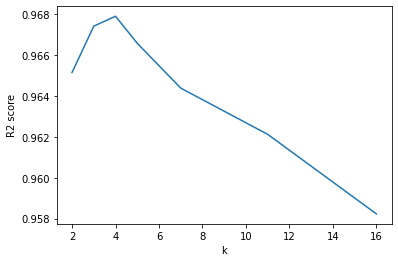

In [12]:
# plot
plt.plot(k_val, r2_score_val)

plt.xlabel('k') 
plt.ylabel('R2 score') 

### Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

- Are the R-squared scores the same?
    - Ans: No

- How to choose best k?
    - If no classes is two then choose odd k
    - other wise choose k as sqrt(n)

### Report the performance of scikit-learn’s kNN regression algorithm.  

In [13]:
# scikit-learn KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

k_val = [2,3,4,5,7,11,16]
data = []

r2_squre_scikit = []

for k in k_val:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, Y_train)
    
    Y_pred = knnreg.predict(X_test)
    data.append([k, cal_MAE(Y_pred, Y_test)])
    
    r2_squre_scikit.append([k, cal_MAE(Y_pred, Y_test), cal_MSE(Y_pred, Y_test), cal_R2(Y_pred, Y_test)])

headr = ['k', 'MAE']
print(tabulate(data, headers=headr, tablefmt="fancy_grid"))

╒═════╤═════════╕
│   k │     MAE │
╞═════╪═════════╡
│   2 │ 370.048 │
├─────┼─────────┤
│   3 │ 358.132 │
├─────┼─────────┤
│   4 │ 354.045 │
├─────┼─────────┤
│   5 │ 360.939 │
├─────┼─────────┤
│   7 │ 368.659 │
├─────┼─────────┤
│  11 │ 380.761 │
├─────┼─────────┤
│  16 │ 403.208 │
╘═════╧═════════╛


### Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [14]:
# Comparison
print("My KNN Regressor results")
headr = ['k', 'MAE', 'MSE', 'R2 Score']
print(tabulate(error, headers=headr, tablefmt="fancy_grid"))

print("\n\nscikit-learn KNN Regressor results")
print(tabulate(r2_squre_scikit, headers=headr, tablefmt="fancy_grid"))

My KNN Regressor results
╒═════╤═════════╤════════╤════════════╕
│   k │     MAE │    MSE │   R2 Score │
╞═════╪═════════╪════════╪════════════╡
│   2 │ 370.241 │ 545051 │   0.965143 │
├─────┼─────────┼────────┼────────────┤
│   3 │ 358.115 │ 509632 │   0.967408 │
├─────┼─────────┼────────┼────────────┤
│   4 │ 354.018 │ 502057 │   0.967893 │
├─────┼─────────┼────────┼────────────┤
│   5 │ 360.941 │ 522753 │   0.966569 │
├─────┼─────────┼────────┼────────────┤
│   7 │ 368.647 │ 556998 │   0.964379 │
├─────┼─────────┼────────┼────────────┤
│  11 │ 380.754 │ 592337 │   0.962119 │
├─────┼─────────┼────────┼────────────┤
│  16 │ 403.208 │ 653169 │   0.958229 │
╘═════╧═════════╧════════╧════════════╛


scikit-learn KNN Regressor results
╒═════╤═════════╤════════╤════════════╕
│   k │     MAE │    MSE │   R2 Score │
╞═════╪═════════╪════════╪════════════╡
│   2 │ 370.048 │ 544854 │   0.965156 │
├─────┼─────────┼────────┼────────────┤
│   3 │ 358.132 │ 509644 │   0.967407 │
├─────┼─────────┼─

### From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


- Advantages of KNN
    - No Training Period
    - Very easy to implement for multi-class problem
    - new data can be added seamlessly
    - K-NN has no assumptions
    - Can be used both for Classification and Regression
    - Variety of distance criteria to be choose from
        - Euclidean Distance
        - Hamming Distance
        - Manhattan Distance
        - Minkowski Distance
    
- Dis-advantages of KNN
    - Does not work well with large dataset
    - Need feature scaling
    - Sensitive to noisy data, missing values and outliers
    - Does not work well with high dimensions
    - K-NN needs homogeneous features
    - Imbalanced data causes problems